In [2]:
from bhmie import bhmie
from math import pi, log
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bhmie

<function bhmie.bhmie(x, refrel, nang)>

In [4]:
refrel = complex(1.33, 10**-8) # water/air 
radius = 0.263 # um
wavelength = 550 # nm
refrel

(1.33+1e-08j)

In [5]:
abs(refrel)

1.33

In [6]:
x = (2*pi*radius*10**-6)/(wavelength*10**-9)
x

3.00450497416042

In [146]:
nang = 100
# nang = number of angles between 0 and 90 degrees inculsive. 
# (will calculate 2*nang-1 directions from 0 to 180 deg.)
# if called with nang<2, will set nang=2 and will compute
# scattering for theta=0,90,180.
out = bhmie(x,refrel,nang)

/Users/user/Documents/Code/mie-simualtion-1/bhmie.py:82: ComplexWarning: Casting complex values to real discards the imaginary part
  d[nn-n-1] = (en/y) - (1./ (d[nn-n]+en/y))


In [147]:
S1 = out[0]
S2 = out[1]
Qext = out[2]
Qsca = out[3] 
Qback = out[4]
gsca = out[5]
print(Qext, Qsca, Qback, gsca)
print(np.size(S1))

1.7590918145340875 1.7590918148191308 0.0906659207577428 0.7836387284609981
199


In [148]:
def phaseFunction(S1, S2):
    # unpolarised, S, P
    return [
        0.5*(abs(S1)**2+abs(S2)**2), # avg
        abs(S2)**2, # S
        abs(S1)**2 # P
    ]
phase = phaseFunction(S1, S2)

In [149]:
xdeg = np.linspace(0,180,2*nang-1) # 2*nang-1 angles between 0 and 180 inc.
xdeg

array([  0.        ,   0.90909091,   1.81818182,   2.72727273,
         3.63636364,   4.54545455,   5.45454545,   6.36363636,
         7.27272727,   8.18181818,   9.09090909,  10.        ,
        10.90909091,  11.81818182,  12.72727273,  13.63636364,
        14.54545455,  15.45454545,  16.36363636,  17.27272727,
        18.18181818,  19.09090909,  20.        ,  20.90909091,
        21.81818182,  22.72727273,  23.63636364,  24.54545455,
        25.45454545,  26.36363636,  27.27272727,  28.18181818,
        29.09090909,  30.        ,  30.90909091,  31.81818182,
        32.72727273,  33.63636364,  34.54545455,  35.45454545,
        36.36363636,  37.27272727,  38.18181818,  39.09090909,
        40.        ,  40.90909091,  41.81818182,  42.72727273,
        43.63636364,  44.54545455,  45.45454545,  46.36363636,
        47.27272727,  48.18181818,  49.09090909,  50.        ,
        50.90909091,  51.81818182,  52.72727273,  53.63636364,
        54.54545455,  55.45454545,  56.36363636,  57.27

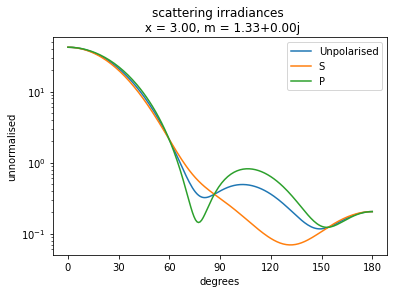

In [173]:
plt.yscale("log")
plt.plot(xdeg,phase[0],label='Unpolarised')
plt.plot(xdeg,phase[1], label = 'S')
plt.plot(xdeg,phase[2], label = 'P')
plt.xlabel('degrees')
plt.ylabel('unnormalised')
plt.title('scattering irradiances \n x = {0:.2f}, m = {1:.2f}'.format(x, refrel))
plt.legend()
plt.xticks(np.linspace(0,180,6+1))
plt.show()

In [172]:
np.linspace(0,180,6+1)

array([  0.,  30.,  60.,  90., 120., 150., 180.])